In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [30]:
data = load_breast_cancer()

In [40]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.data, data.target, test_size=0.33)
N, D = Xtrain.shape

In [41]:
# Scale the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [42]:
# Build the model
model = nn.Linear(D, 1)

In [43]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [44]:
# Converting data to torch tensors
Xtrain = torch.from_numpy(Xtrain.astype(np.float32))
Xtest = torch.from_numpy(Xtest.astype(np.float32))
Ytrain = torch.from_numpy(Ytrain.astype(np.float32).reshape(-1, 1))
Ytest = torch.from_numpy(Ytest.astype(np.float32).reshape(-1, 1))

In [45]:
n_epochs = 1000
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_acc = np.zeros(n_epochs)
test_acc = np.zeros(n_epochs)

for i in range(n_epochs):
  # zero the gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(Xtrain)
  loss = criterion(outputs, Ytrain)

  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  # This will tell us whether or not our model is overfitting
  # If we see the test loss increasing during training then we know that we are overfitting
  outputs_test = model(Xtest)
  loss_test = criterion(outputs_test, Ytest)

  def round_line(outputs):
    return outputs.numpy() > 0

  with torch.no_grad():
    train_acc[i] = np.mean(round_line(outputs) == Ytrain.numpy())
    test_acc[i] = np.mean(round_line(outputs_test) == Ytest.numpy())

  # Save losses
  train_losses[i] = loss.item()
  test_losses[i] = loss_test.item()

  if (i + 1) % 50 == 0:
    print(f"Epoch: {i+1}/{n_epochs}, Train Loss: {train_losses[i]:.4f}, Test Loss: {test_losses[i]:.4f}")

Epoch: 50/1000, Train Loss: 0.4526, Test Loss: 0.4385
Epoch: 100/1000, Train Loss: 0.3315, Test Loss: 0.3218
Epoch: 150/1000, Train Loss: 0.2696, Test Loss: 0.2636
Epoch: 200/1000, Train Loss: 0.2314, Test Loss: 0.2277
Epoch: 250/1000, Train Loss: 0.2052, Test Loss: 0.2025
Epoch: 300/1000, Train Loss: 0.1859, Test Loss: 0.1835
Epoch: 350/1000, Train Loss: 0.1711, Test Loss: 0.1685
Epoch: 400/1000, Train Loss: 0.1593, Test Loss: 0.1563
Epoch: 450/1000, Train Loss: 0.1498, Test Loss: 0.1461
Epoch: 500/1000, Train Loss: 0.1418, Test Loss: 0.1374
Epoch: 550/1000, Train Loss: 0.1351, Test Loss: 0.1300
Epoch: 600/1000, Train Loss: 0.1294, Test Loss: 0.1235
Epoch: 650/1000, Train Loss: 0.1244, Test Loss: 0.1179
Epoch: 700/1000, Train Loss: 0.1201, Test Loss: 0.1129
Epoch: 750/1000, Train Loss: 0.1162, Test Loss: 0.1085
Epoch: 800/1000, Train Loss: 0.1128, Test Loss: 0.1045
Epoch: 850/1000, Train Loss: 0.1098, Test Loss: 0.1010
Epoch: 900/1000, Train Loss: 0.1070, Test Loss: 0.0978
Epoch: 950/

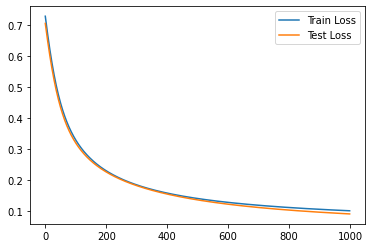

In [46]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend();

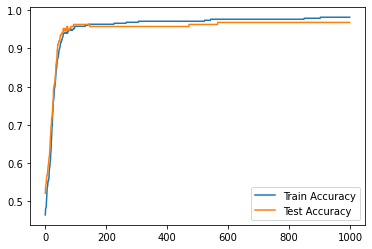

In [47]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.legend();

In [48]:
with torch.no_grad():
  ptrain = round_line(model(Xtrain))
  train_acc = np.mean(ptrain == Ytrain.numpy())

  ptest = round_line(model(Xtest))
  test_acc = np.mean(ptest == Ytest.numpy())

  print(f"Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")

Train Accuracy: 0.98, Test Accuracy: 0.97
